<a href="https://colab.research.google.com/github/AyuBuradkar26/CR_internship/blob/main/Project_3_DisneyStudioIncome_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Disney Studio Income Analysis

## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Task 1: Data Exploration

Checking Null Values , release_date into datatime , best & worst total gross


*   DataSet_explore



In [ ]:
df=pd.read_csv("/content/disney_movies.csv")

In [ ]:
df.head(6)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000,528279994


In [ ]:
df.shape

(579, 6)

In [ ]:
df.describe()

,total_gross,inflation_adjusted_gross
count,5.790000e+02,5.790000e+02
mean,6.470179e+07,1.187625e+08
std,9.301301e+07,2.860853e+08
min,0.000000e+00,0.000000e+00
25%,1.278886e+07,2.274123e+07
50%,3.070245e+07,5.515978e+07
75%,7.570903e+07,1.192020e+08
max,9.366622e+08,5.228953e+09


In [ ]:
df.columns

Index(['movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross',
       'inflation_adjusted_gross'],
      dtype='object')



*   Checking null values



In [ ]:
df.isnull().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [ ]:
df['genre'].fillna("Unknown",inplace=True)
df.isnull().sum()

movie_title                  0
release_date                 0
genre                        0
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [ ]:
df['mpaa_rating'].fillna("Not Found",inplace=True)
df.isnull().sum()

movie_title                 0
release_date                0
genre                       0
mpaa_rating                 0
total_gross                 0
inflation_adjusted_gross    0
dtype: int64

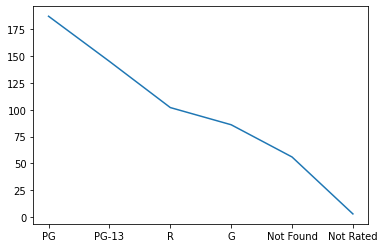

In [ ]:
plt.plot(df["mpaa_rating"].value_counts())



*   Changing release_date datatype to datetime



In [ ]:
df["release_date"]=pd.to_datetime(df["release_date"])
df.dtypes

movie_title                         object
release_date                datetime64[ns]
genre                               object
mpaa_rating                         object
total_gross                          int64
inflation_adjusted_gross             int64
dtype: object



*   Minimum total_gross



In [ ]:
min=df["total_gross"].min()
min

0

In [ ]:
df[df["total_gross"]==min]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
20,The Many Adventures of Winnie the Pooh,1977-03-11,Unknown,Not Found,0,0
27,Amy,1981-03-20,Drama,Not Found,0,0
29,Condorman,1981-08-07,Action,Not Found,0,0
355,Frank McKlusky C.I.,2002-01-01,Unknown,Not Found,0,0




*   Maximum total_gross



In [ ]:
Max=df["total_gross"].max()
Max

936662225

In [ ]:
df[df["total_gross"]==Max]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225


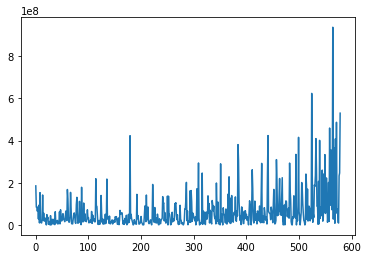

In [ ]:
plt.plot(df["total_gross"])

## Task 2: Visualize Year Distribution Plot

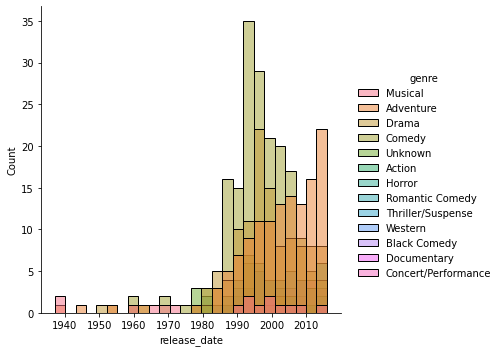

In [ ]:
dty=df["release_date"].dt.year
sns.displot(df,x=dty,hue="genre")

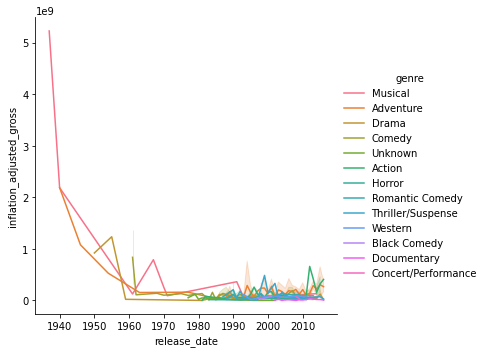

In [ ]:
sns.relplot(x=dty, y='inflation_adjusted_gross', kind='line', hue='genre',data=df)

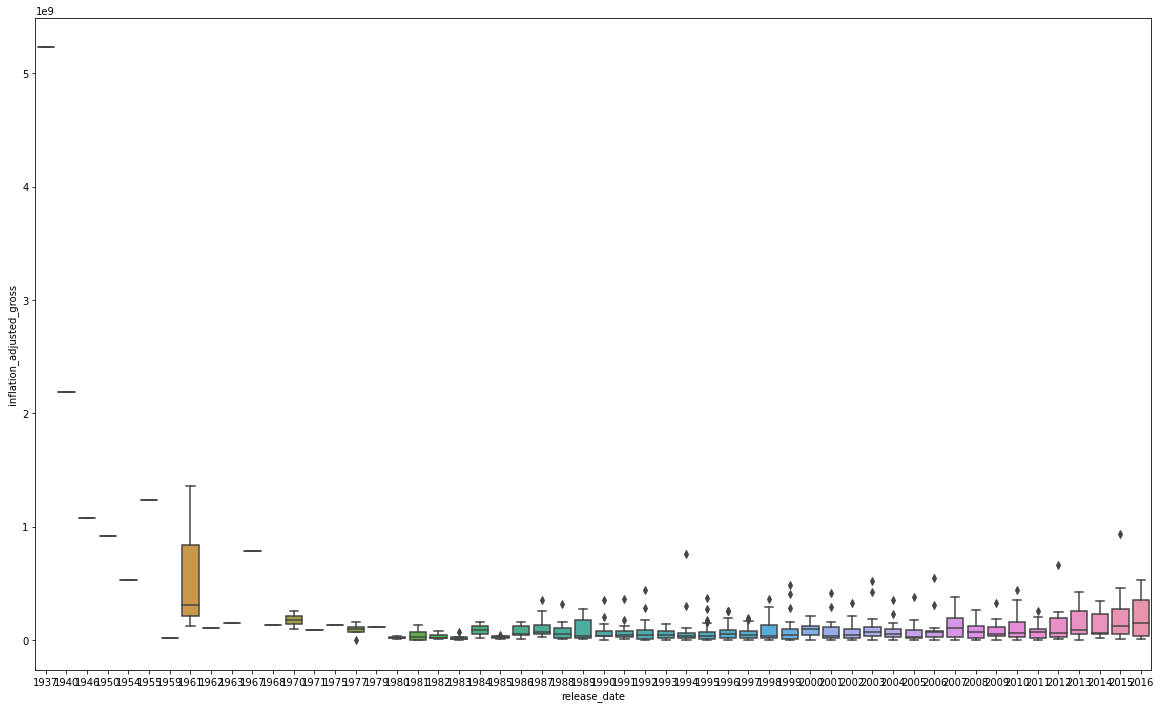

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
sns.boxplot(x=dty, y="inflation_adjusted_gross",data=df,ax=ax)

## Task 3: Does Movies Income Decreased or Increased?

In [ ]:
T=df[['movie_title','release_date','total_gross','inflation_adjusted_gross']].sort_values(['inflation_adjusted_gross'], ascending=False).head(10)
T

,movie_title,release_date,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,184925485,5228953251
1,Pinocchio,1940-02-09,84300000,2188229052
2,Fantasia,1940-11-13,83320000,2187090808
8,101 Dalmatians,1961-01-25,153000000,1362870985
6,Lady and the Tramp,1955-06-22,93600000,1236035515
3,Song of the South,1946-11-12,65000000,1078510579
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,936662225,936662225
4,Cinderella,1950-02-15,85000000,920608730
13,The Jungle Book,1967-10-18,141843000,789612346
179,The Lion King,1994-06-15,422780140,761640898


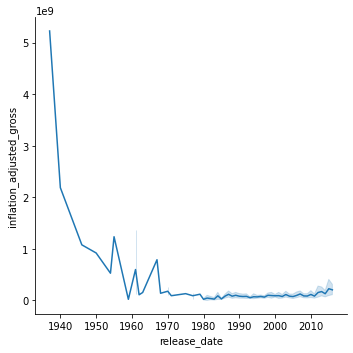

In [ ]:
dy=df["release_date"].dt.year
sns.relplot(x=dy, y='inflation_adjusted_gross', kind='line',data=df)

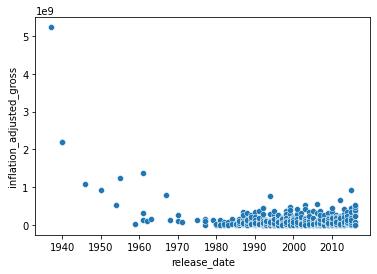

In [ ]:
x=df["release_date"].dt.year
y=df["inflation_adjusted_gross"]
sns.scatterplot(x=x,y=y)

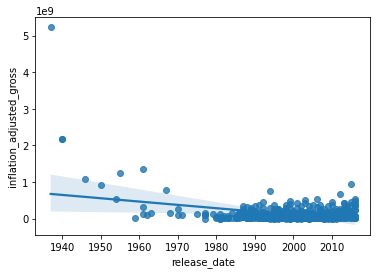

In [ ]:
sns.regplot(x=x,y=y)

Movie income decreases along with year

## Task 4: Describe the total counts of Genres

In [ ]:
G=df["genre"].value_counts()
G

Comedy                 182
Adventure              129
Drama                  114
Action                  40
Thriller/Suspense       24
Romantic Comedy         23
Unknown                 17
Musical                 16
Documentary             16
Western                  7
Horror                   6
Black Comedy             3
Concert/Performance      2
Name: genre, dtype: int64

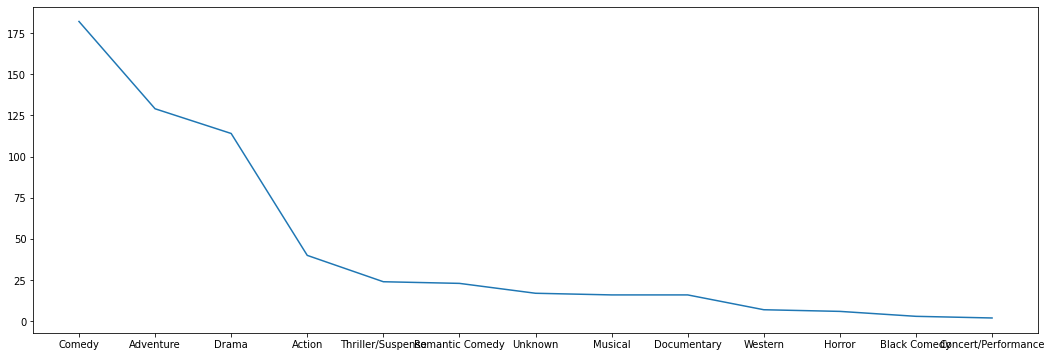

In [ ]:
plt_1 = plt.figure(figsize=(18,6))
plt.plot(G)

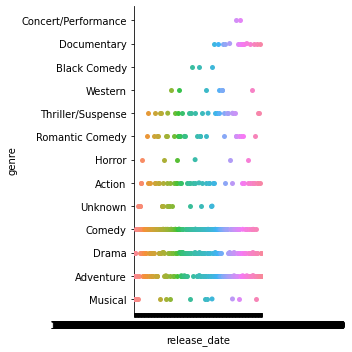

In [ ]:

sns.catplot(x="release_date", y="genre", data=df)